In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('risk_factors_cervical_cancer.csv') # чтение данных из файла

In [3]:
df.head() # посмотрим на наши данные

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.info() # посмотрим на нашу сводную информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
for name in list(df):
    df.loc[(df[name]=="?"), name] = -999 # дефолтный плейсхолдер для пропусков
y = df['Dx:Cancer'] # выделяем целевую переменную
X = df.drop('Dx:Cancer', axis = 1) # удалем целевую переменную из обучающего множества
# Удаляем два неинформативных столбца (содержат много пропусков)
X = X.drop('STDs: Time since first diagnosis', axis = 1)
X = X.drop('STDs: Time since last diagnosis', axis = 1)
X # посмотрим на получившееся обучающее множество

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,-999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [6]:
# Далее нам необходимо тип object привести к числовому типу
# но по сути они у нас являются str(*число*), поэтому сделать это несложно
for name in list(X):
    X[name] = pd.to_numeric(X[name])
X.info() # посмотрим результат нашего преобразования

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [7]:
sc = StandardScaler() # нормализация данных (датафрейм --> массив)
sc.fit(X)
X = sc.transform(X)
# Посмотрим как выглядит теперь множество Х
# данные после нормализации не похожи на исходные значения
X

array([[ -1.03856336,   0.1853443 ,   0.0688313 , ...,  -0.3072259 ,
         -0.23249528,  -0.26171196],
       [ -1.39179566,   0.1678709 ,   0.05789477, ...,  -0.3072259 ,
         -0.23249528,  -0.26171196],
       [  0.84534227,   0.1678709 , -11.02080851, ...,  -0.3072259 ,
         -0.23249528,  -0.26171196],
       ...,
       [ -0.21435465,   0.17369537,   0.09070435, ...,  -0.3072259 ,
          4.30116263,  -0.26171196],
       [  0.72759817,   0.17369537,   0.16726005, ...,  -0.3072259 ,
         -0.23249528,  -0.26171196],
       [  0.25662176,   0.17369537,   0.12351394, ...,  -0.3072259 ,
         -0.23249528,  -0.26171196]])

In [8]:
from sklearn.model_selection import train_test_split
# импортируем функцию, которая поможет нам разбить наши данные на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# получили четыре множества: два для обучения, другие два - для тестирования

from sklearn import svm #импортируем нашу модель

In [9]:
best_model = svm.SVC(kernel='linear', C=1, gamma=1) #зададим начальные параметры для модели
best_model.fit(X_train, y_train) #выполним обучение модели при начальных параметрах

SVC(C=1, gamma=1, kernel='linear')

In [10]:
from sklearn.model_selection import GridSearchCV # используем полный перебор параметров

In [11]:
model_params = best_model.get_params() #зададим параметры по которым и будем осуществлять поиск
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['gamma'] = range(1, 100)
# учтем метрику ROC AUC
clf = GridSearchCV(best_model, tuned_params, cv=10, n_jobs=-1, scoring = "roc_auc")
clf.fit(X_train, y_train)
best_params = clf.best_params_

In [12]:
from sklearn import metrics              # импортируем метрики
best_model = svm.SVC(**best_params)      # задаем найденные наилучшие параметры
best_model.fit(X_train, y_train)         # обучаем модель
predicted = best_model.predict(X_test)   # делаем предсказание
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [13]:
print('Used params:', best_params)       # выведем наилучшие параметры
print('Evaluation:\n', metrics.classification_report(y_test, predicted))
#лучшие значения метрик (те значения, которые поулчаются при наилучших параметрах модели)

Used params: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       167
           1       0.83      1.00      0.91         5

    accuracy                           0.99       172
   macro avg       0.92      1.00      0.95       172
weighted avg       1.00      0.99      0.99       172



Перебрал значения параметра "gamma" от 1 до 100, подбирая такое значение, при котором ошибка была бы минмальной. Посколько мы не знаем изначально какие параметры нужно подбирать чтобы получить наилучший результат, то можно проводить подобный поиск несколько раз.
Давайте посмотрим сколько ошибок делает наша модель. Для этого построим матрицу ошибок.

Рассчитаем итоговую средннюю абсолютную ошибку и сравним со среднеквадратичным отклонением.

In [14]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, predicted)
standard_deviation = y_test.var()**0.5
print(f"Ошибка при предсказании: {error}, среднеквадр. отклонение: {standard_deviation}")

Ошибка при предсказании: 0.005813953488372093, среднеквадр. отклонение: 0.16849264934060793


Средняя ошибка существенно меньше чем среднеквадр. отклонение, что говорит о том, что модель в какой то степени может предсказать результат по данным характеристикам человека. 

ГЛАВНОЕ: средняя ошибка весьма мала,что говорит о высокой точности модели при предсказании. 

Узнаем теперь полезные "фичи" ниже.

<AxesSubplot:>

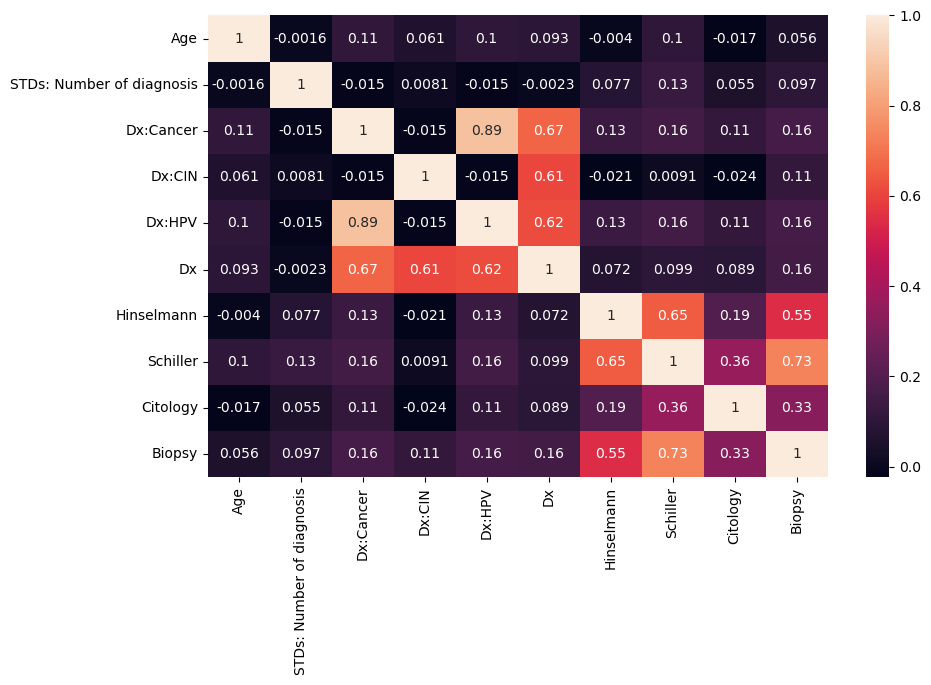

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Матрица корреляции
correlation_matrix = df.corr()
# Выводим признаки на тепловую карту
plt.figure(figsize= (10, 6))
sns.heatmap(correlation_matrix, annot = True)